In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

#Create a simple signal with two frequencies

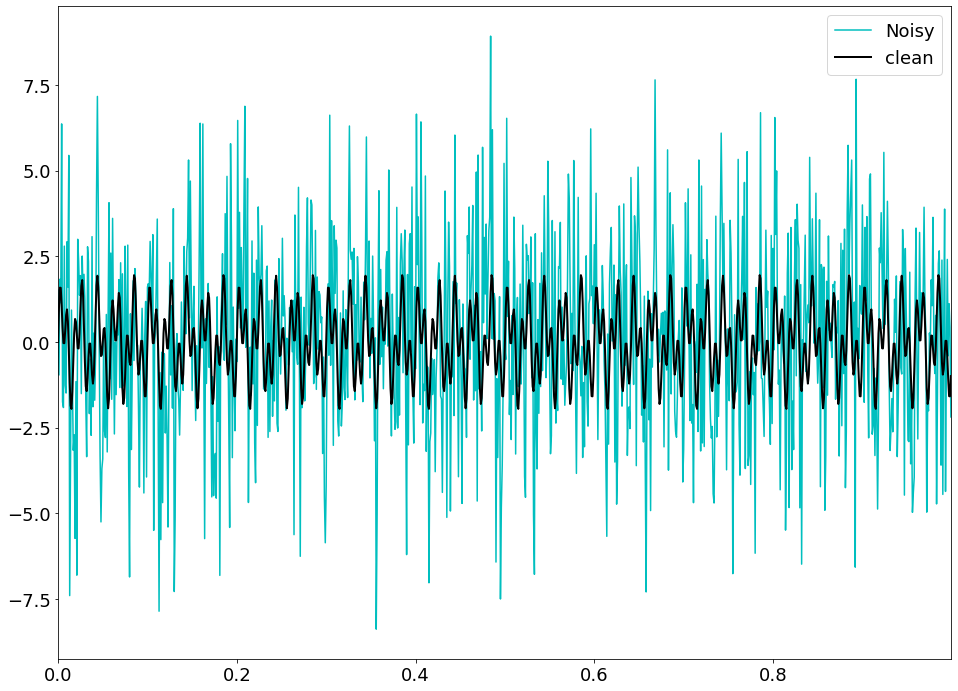

In [2]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) #sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t)) #add some noise

plt.plot(t,f,color = 'c', linewidth = 1.5 , label = 'Noisy')
plt.plot(t,f_clean,color = 'k',linewidth = 2 , label = 'clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

C:\Users\biswa\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


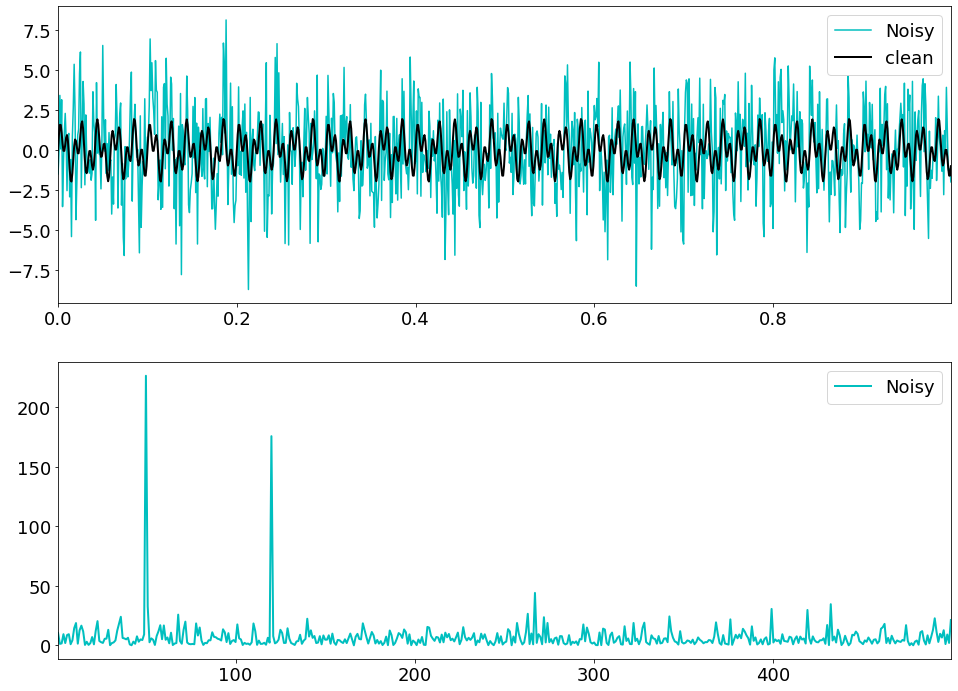

In [23]:
## compute the Fast Fourier Transform(FFT)

n = len(t)
fhat = np.fft.fft(f,n) #compute the fft
psd = fhat * np.conj(fhat) / n # power spectrum per frequency
freq = (1/(dt*n)) * np.arange(n) #Create x-axis of frequencies
L = np.arange(1,np.floor(n/2),dtype = 'int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color = 'c', linewidth = 1.5 , label = 'Noisy')
plt.plot(t,f_clean,color = 'k',linewidth = 2 , label = 'clean')
plt.xlim(t[0],t[-1])
plt.legend()


plt.sca(axs[1])
plt.plot(freq[L],psd[L],color = 'c', linewidth = 2 , label = 'Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()



In [24]:
## use psd to filter out noise 
indices = psd > 100 # find all freqs with large power
psd_clean = psd * indices #zero out all others
fhat = fhat * indices #zero out small coeffs ie in Y
ffilter = np.fft.ifft(fhat) #inverse fft for time signal

C:\Users\biswa\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\biswa\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\biswa\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


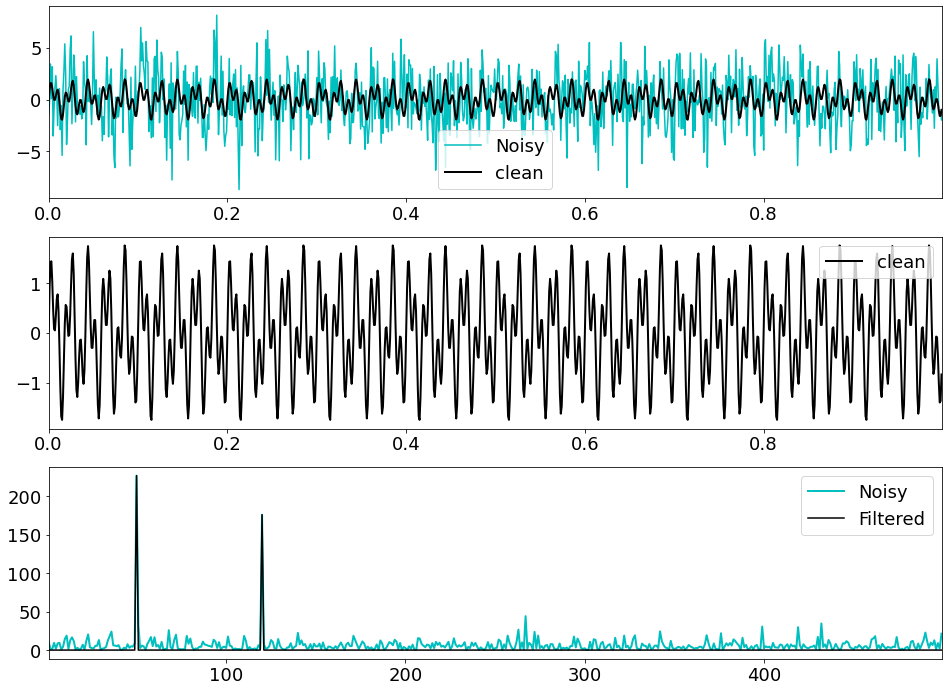

In [25]:
## Plot

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color = 'c', linewidth = 1.5 , label = 'Noisy')
plt.plot(t,f_clean,color = 'k',linewidth = 2 , label = 'clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilter,color = 'k',linewidth = 2 , label = 'clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],psd[L],color = 'c', linewidth = 2 , label = 'Noisy')
plt.plot(freq[L],psd_clean[L],color = 'k', linewidth = 1.5 , label = 'Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

